In [57]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns



import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf

import geopandas as gpd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

saveFigures is set to: True
Done loading packages


In [58]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

In [59]:
# Get case data
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

dfCase = pd.read_csv(latestdir+'/Kommunalt_DB/07_bekraeftede_tilfaelde_pr_dag_pr_kommune.csv',encoding='latin1',delimiter=';')
dfCase['Dato'] = pd.to_datetime(dfCase['Dato'])

In [60]:
# Get case data
latestsubdir = list(os.walk(path_data))[0][1][-1]
latestdir = path_data + latestsubdir

dfCase2 = pd.read_csv(latestdir+'/Municipality_cases_time_series.csv',delimiter=';')
dfCase2['SampleDate'] = pd.to_datetime(dfCase2['SampleDate'])

In [61]:
# Get test data
latestsubdir = list(os.walk(path_data))[0][1][-1]
latestdir = path_data + latestsubdir

dfTest = pd.read_csv(latestdir+'/Municipality_tested_persons_time_series.csv',delimiter=';')
dfTest['PrDate_adjusted'] = pd.to_datetime(dfTest['PrDate_adjusted'])
dfTest['Dato'] = pd.to_datetime(dfTest['PrDate_adjusted'])
# dfTest

In [62]:

curCase = dfCase[dfCase.Kommunenavn == 'København']['Bekræftede tilfælde i alt']
curTest = dfTest.Copenhagen.values[-len(curCase):]
curPos = curCase/curTest 
curDates = dfTest.Dato.values[-len(curCase):]


curCase = curCase[:-1]
curTest = curTest[:-1]
curPos = curPos[:-1]
curDates = curDates[:-1]

(0.0, 9030.0)

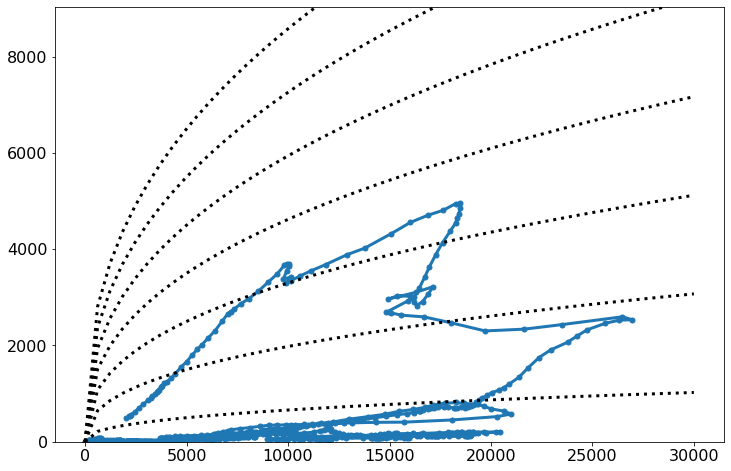

In [63]:


testSpan = np.linspace(0,30)*1000
baseTest = 50000
baseTest = 5000
beta =  0.4
 

fig,ax1 = plt.subplots() 
ax1.plot(pf.rnMean(curTest),pf.rnMean(curCase),'.-')

# baseCase = 5000
# caseSpan = baseCase * (testSpan/baseTest)**beta
# ax1.plot(testSpan,caseSpan,'k:')
# baseCase = 2000
# caseSpan = baseCase * (testSpan/baseTest)**beta
# ax1.plot(testSpan,caseSpan,'k:')
baseCase = 1000
for baseCase in np.arange(500,7500,1000):
    caseSpan = baseCase * (testSpan/baseTest)**beta
    ax1.plot(testSpan,caseSpan,'k:')

# cases1 = curCase * (curTest/baseTest)**beta
# ax1.plot(pf.rnMean(curTest),pf.rnMean(cases1))

ax1.set_ylim(top=np.max(curCase)*1.5,bottom=0)

(18536.0, 19105.15)

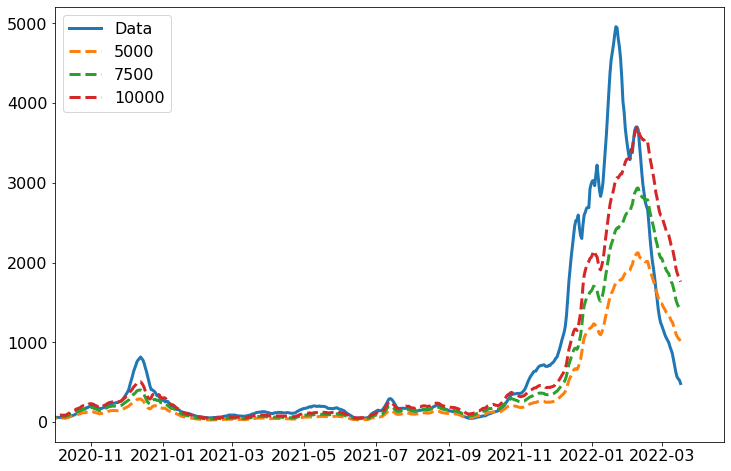

In [64]:
fig,ax = plt.subplots()

ax.plot(pf.rnTime(curDates),pf.rnMean(curCase),label='Data')

beta = 0.8
baseTestsToUse = [5000,7500,10000]
for baseTest in baseTestsToUse:
    cases1 = curCase / (curTest/baseTest)**beta
    ax.plot(pf.rnTime(curDates),pf.rnMean(cases1),'--',label=str(baseTest))

ax.legend()

ax.set_xlim(left=np.datetime64('2020-10-01'))

In [65]:
dfToSave = pd.DataFrame() 

dfToSave['Dato'] = curDates
dfToSave['Test'] = curTest
dfToSave['Data'] = curCase.values 
baseTest = 5000
dfToSave['Correct5000'] = curCase.values / (curTest/baseTest)**beta
baseTest = 7500
dfToSave['Correct7500'] = curCase.values / (curTest/baseTest)**beta
baseTest = 10000
dfToSave['Correct10000'] = curCase.values / (curTest/baseTest)**beta

baseTest = 5000
dfToSave['Index5000'] = 1 / (curTest/baseTest)**beta
baseTest = 7500
dfToSave['Index7500'] = 1 / (curTest/baseTest)**beta
baseTest = 10000
dfToSave['Index10000'] = 1 / (curTest/baseTest)**beta



dfToSave
dfToSave.to_csv(path_data+'../CopenhagenTestCorrected.csv',index=False)

# Positive percentage

In [66]:
def getCombinedDF(komNavn):

    curdf = dfCase[dfCase.Kommunenavn == komNavn]
    df1 = curdf.iloc[:,-2:]

    if komNavn == 'København':
        komNavn2 = 'Copenhagen'
    elif komNavn == 'Århus':
        komNavn2 = 'Aarhus'
    elif komNavn == 'Nordfyn':
        komNavn2 = 'Nordfyns'
    elif komNavn == 'Vesthimmerland':
        komNavn2 = 'Vesthimmerlands'
    elif komNavn == 'Høje Tåstrup':
        komNavn2 = 'Høje-Taastrup'
    else:
        komNavn2 = komNavn 

    df2 = dfTest.loc[:,[komNavn2,'Dato']]

    dfComb = pd.merge(df1,df2,how='outer',on='Dato')
    dfComb = dfComb.rename(columns={'Bekræftede tilfælde i alt':'Case',komNavn2:'Test'})

    dfComb = dfComb.sort_values(by='Dato')
    dfComb = dfComb.fillna(0)
    dfComb = dfComb.reset_index(drop=True)

    return dfComb

# getCombinedDF('Holbæk')
# dfTest.columns == 'Aarhus'
# np.where(dfCase.Kommunenavn == 'Århus')

In [67]:
curOrder = np.argsort(dfCase2.iloc[:,1:].sum())
# dfCase2.loc[:,dfCase2.columns[1:][curOrder][-10:]].sum()

In [68]:
# komNavn = 'Aalborg'


# curOrder = np.argsort(dfCase2.iloc[:,1:].sum())
# colsToPlot = dfCase2.columns[1:][curOrder][-10:]


# curOrder = np.argsort(dfCase.groupby('Kommunenavn').sum().iloc[:,1])
# colsToPlot  = dfCase.groupby('Kommunenavn').sum().index[curOrder][-10:]

colsToPlot = dfCase.Kommunenavn.unique()


for komNavn in colsToPlot:

    dfComb = getCombinedDF(komNavn)

    fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

    # ax.plot(dfComb.Dato,dfComb.Test,'k.:',linewidth=0.5,markersize=1)
    ax1.fill_between(pf.rnTime(dfComb.Dato),pf.rnMean(dfComb.Test),label='Negative',color='xkcd:grey')
    ax1.fill_between(pf.rnTime(dfComb.Dato),pf.rnMean(dfComb.Case),label='Positive',color='xkcd:light red')
    ax1.set_ylim(bottom=0)
    ax1.legend(loc='upper right')


    ax2.fill_between(pf.rnTime(dfComb.Dato),100*pf.rnMean(dfComb.Test/dfComb.Test),color='xkcd:grey')
    ax2.fill_between(pf.rnTime(dfComb.Dato),100*pf.rnMean(dfComb.Case/dfComb.Test),color='xkcd:light red')

    ax2.set_ylim([0,50])
    ax1.set_ylabel('Antal test')
    ax2.set_ylabel('Positiv andel af test [%]')

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    ax1.set_xlim(left=np.datetime64('2021-11'),right=np.datetime64('today'))

    ax1.spines['top'].set_visible(False) 
    ax1.spines['right'].set_visible(False) 
    ax2.spines['top'].set_visible(False) 
    ax2.spines['right'].set_visible(False) 

    ax1.grid(axis='y',alpha=0.2)
    ax1.set_axisbelow(True)
    ax2.grid(axis='y',alpha=0.2,color='k')

    ax1.set_title(komNavn)

    fig.tight_layout()

    fig.savefig(path_figs+'KommunePosPct/'+komNavn)

    plt.close()

In [69]:

colsToPlot = dfCase.Kommunenavn.unique()

# colsToPlot = ['København','Århus','Aalborg']

for komNavn in colsToPlot:

    dfComb = getCombinedDF(komNavn)

    # fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
    fig,ax1 = plt.subplots()
        
    ax1.plot(pf.rnTime(dfComb.Dato),pf.rnMean(dfComb.Case),color='k',label='Data')
    beta = 0.8
    # baseTestsToUse = [5000,7500,10000]

    curMaxTest = dfComb.Test.max()
    curMaxTest = np.round(curMaxTest/1000)*1000
    baseTestsToUse = [0.05*curMaxTest,0.1*curMaxTest,0.25*curMaxTest]

    DatesToCompare = [np.datetime64('2021-11-01'), np.datetime64('2021-10-01')]

    baseTestsToUse = dfComb[(dfComb.Dato == np.datetime64('2021-11-01')) | (dfComb.Dato == np.datetime64('2021-10-01'))].Test.values
    # baseTestsToUse = dfComb[(dfComb.Dato == np.datetime64('2021-11-01')) | (dfComb.Dato == np.datetime64('2021-10-01'))].Test.values

    baseTestsToUse = [dfComb[(dfComb.Dato == x)].Test.values[0] for x in DatesToCompare]

    # for baseTest in baseTestsToUse:
    for i,baseTest in enumerate(baseTestsToUse):

        curLabel = f'Testaktivitet som {DatesToCompare[i]}'
        cases1 = dfComb.Case / (dfComb.Test/baseTest)**beta
        ax1.plot(pf.rnTime(dfComb.Dato),pf.rnMean(cases1),'--',label=curLabel)
        # ax1.plot(pf.rnTime(dfComb.Dato),pf.rnMean(cases1),'--',label=str(baseTest))

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
    ax1.set_xlim(left=np.datetime64('2021-11'),right=np.datetime64('today'))
    ax1.legend()
    ax1.set_ylim(bottom=0)
    ax1.spines['top'].set_visible(False) 
    ax1.spines['right'].set_visible(False) 

    ax1.grid(axis='y',alpha=0.3)
    ax1.set_axisbelow(True)

    # pf.addWeekendsToAx(ax1)

    ax1.set_ylabel('Antal smittetilfælde')

    ax1.set_title(komNavn)
    fig.tight_layout()

    fig.savefig(path_figs+'KommuneTestKorrigering/'+komNavn)

    plt.close()


# Old

In [70]:
# curdf = dfCase[dfCase.Kommunenavn == 'København']
# df1 = curdf.iloc[:,-2:]
# df2 = dfTest.loc[:,['Copenhagen','Dato']]

# dfComb = pd.merge(df1,df2,how='outer',on='Dato')
# dfComb = dfComb.rename(columns={'Bekræftede tilfælde i alt':'Case','Copenhagen':'Test'})
# dfComb.tail(20)
# dfComb = dfComb.sort_values(by='Dato')
# dfComb = dfComb.fillna(0)

allNotWorking

[]

In [71]:
dfComb = getCombinedDF('København')

(18901.0, 19110.9)

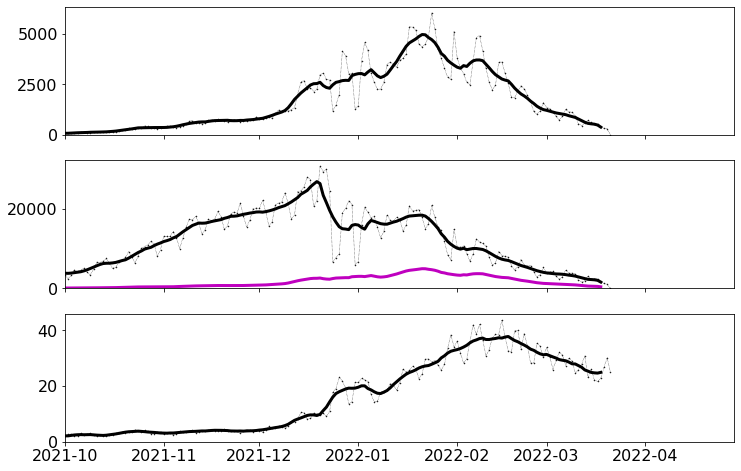

In [72]:
fig,axes = plt.subplots(3,1,sharex=True)

ax = axes[0]
ax.plot(dfComb.Dato,dfComb.Case,'k.:',linewidth=0.5,markersize=1)
ax.plot(pf.rnTime(dfComb.Dato),pf.rnMean(dfComb.Case),'k')
ax.set_ylim(bottom=0)

ax = axes[1]
ax.plot(dfComb.Dato,dfComb.Test,'k.:',linewidth=0.5,markersize=1)
ax.plot(pf.rnTime(dfComb.Dato),pf.rnMean(dfComb.Test),'k')
ax.plot(pf.rnTime(dfComb.Dato),pf.rnMean(dfComb.Case),'m')
ax.set_ylim(bottom=0)

ax = axes[2]
ax.plot(dfComb.Dato,100*dfComb.Case/dfComb.Test,'k.:',linewidth=0.5,markersize=1)
ax.plot(pf.rnTime(dfComb.Dato),100*pf.rnMean(dfComb.Case/dfComb.Test),'k')

ax.set_ylim(bottom=0)

ax.set_xlim(left=np.datetime64('2021-10'))

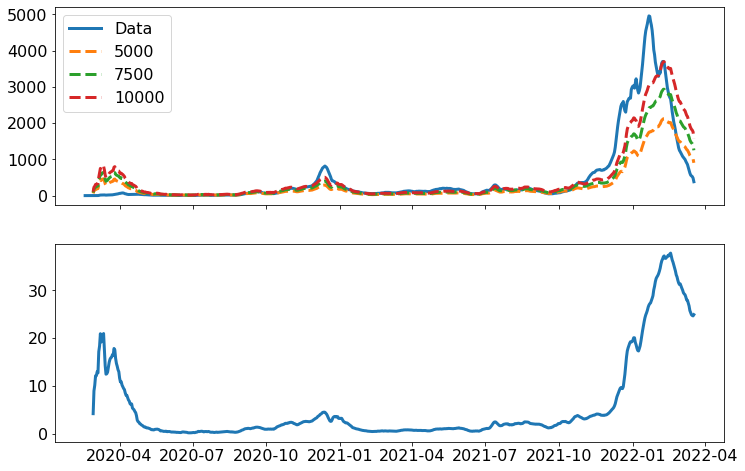

In [73]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

ax1.plot(pf.rnTime(dfComb.Dato),pf.rnMean(dfComb.Case),label='Data')
beta = 0.8
baseTestsToUse = [5000,7500,10000]
for baseTest in baseTestsToUse:
    cases1 = dfComb.Case / (dfComb.Test/baseTest)**beta
    ax1.plot(pf.rnTime(dfComb.Dato),pf.rnMean(cases1),'--',label=str(baseTest))

ax1.legend()

ax2.plot(pf.rnTime(dfComb.Dato),100*pf.rnMean(dfComb.Case/dfComb.Test))

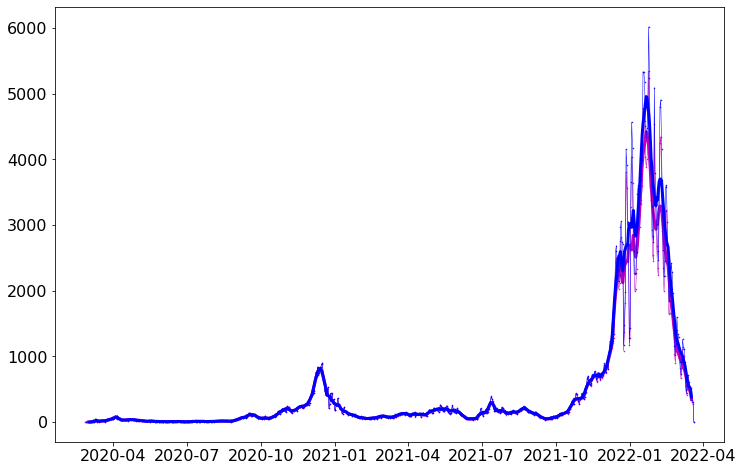

In [74]:
fig,ax1 = plt.subplots() 

curdf = dfCase[dfCase.Kommunenavn == 'København']

ax1.plot(dfCase2.SampleDate,dfCase2.Copenhagen,'m.-',markersize=1,linewidth=0.5)
ax1.plot(pf.rnTime(dfCase2.SampleDate),pf.rnMean(dfCase2.Copenhagen),'m')
ax1.plot(curdf.Dato,curdf['Bekræftede tilfælde i alt'],'b.-',markersize=1,linewidth=0.5)
ax1.plot(pf.rnTime(curdf.Dato),pf.rnMean(curdf['Bekræftede tilfælde i alt']),'b')

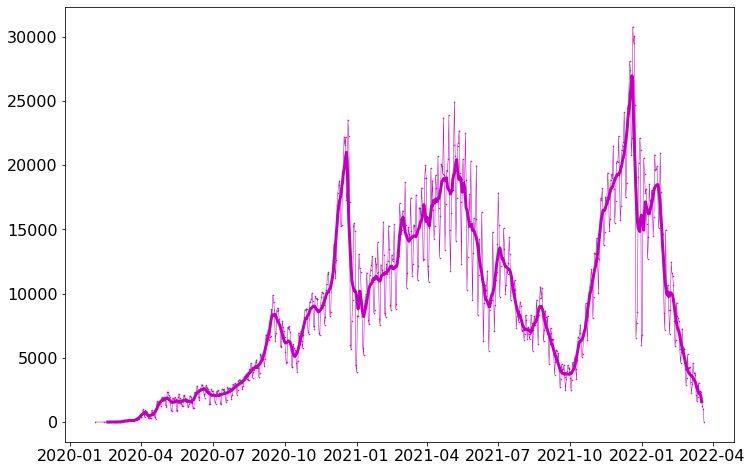

In [75]:
fig,ax1 = plt.subplots() 

ax1.plot(dfTest.Dato,dfTest.Copenhagen,'m.-',markersize=1,linewidth=0.5)
ax1.plot(pf.rnTime(dfTest.Dato),pf.rnMean(dfTest.Copenhagen),'m')

In [76]:
len(dfTest)
# len(dfCase2)

curPos = dfCase2.Copenhagen.values/dfTest.Copenhagen.values[-len(dfCase2):]
curDates = dfTest.Dato.values[-len(dfCase2):]

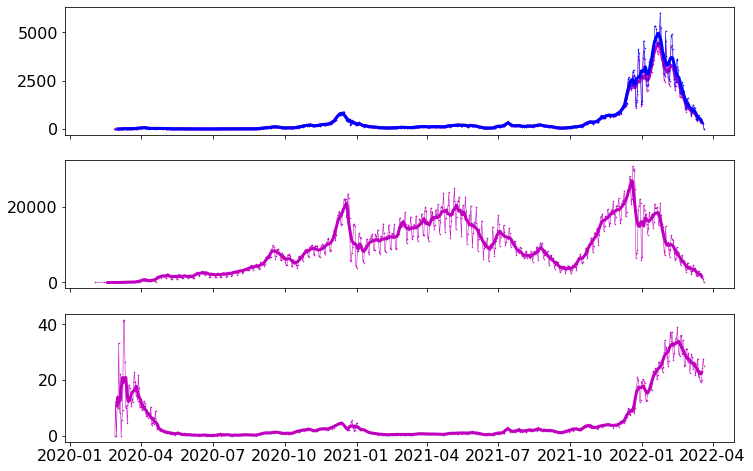

In [77]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True) 

ax1.plot(dfCase2.SampleDate,dfCase2.Copenhagen,'m.-',markersize=1,linewidth=0.5)
ax1.plot(pf.rnTime(dfCase2.SampleDate),pf.rnMean(dfCase2.Copenhagen),'m')
ax1.plot(curdf.Dato,curdf['Bekræftede tilfælde i alt'],'b.-',markersize=1,linewidth=0.5)
ax1.plot(pf.rnTime(curdf.Dato),pf.rnMean(curdf['Bekræftede tilfælde i alt']),'b')

ax2.plot(dfTest.Dato,dfTest.Copenhagen,'m.-',markersize=1,linewidth=0.5)
ax2.plot(pf.rnTime(dfTest.Dato),pf.rnMean(dfTest.Copenhagen),'m')
ax3.plot(curDates,100*curPos,'m.-',markersize=1,linewidth=0.5)
ax3.plot(pf.rnTime(curDates),100*pf.rnMean(curPos),'m')

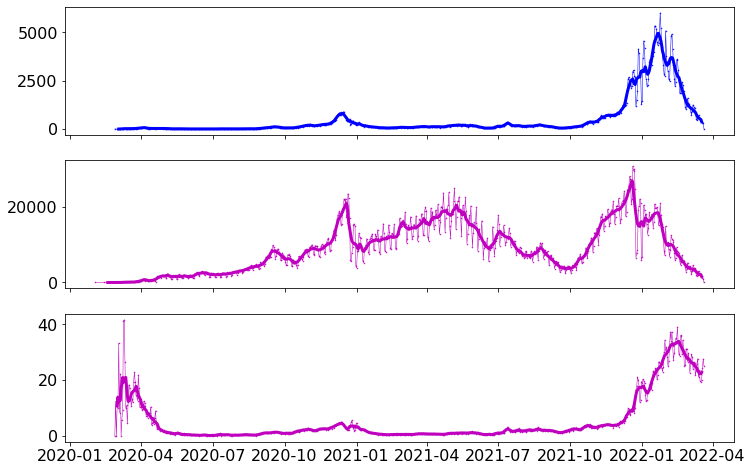

In [78]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True) 

curdf = dfCase[dfCase.Kommunenavn == 'København']
ax1.plot(curdf.Dato,curdf['Bekræftede tilfælde i alt'],'b.-',markersize=1,linewidth=0.5)
ax1.plot(pf.rnTime(curdf.Dato),pf.rnMean(curdf['Bekræftede tilfælde i alt']),'b')

ax2.plot(dfTest.Dato,dfTest.Copenhagen,'m.-',markersize=1,linewidth=0.5)
ax2.plot(pf.rnTime(dfTest.Dato),pf.rnMean(dfTest.Copenhagen),'m')
ax3.plot(curDates,100*curPos,'m.-',markersize=1,linewidth=0.5)
ax3.plot(pf.rnTime(curDates),100*pf.rnMean(curPos),'m')